<a href="https://colab.research.google.com/github/inikanipp/PROMINER_DataMining_Minikiwir/blob/main/Minikiwir_Project_Final_Modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MINIKIWIR TEMPLATE

# 🟡 BUSSINESS UNDERSTANDING

## 1️⃣ Import Libraries

In [1]:
from google.colab import files
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import numpy as np
import os

#🟡 DATA UNDERSTANDING

## 1️⃣ Upload Data

In [2]:
# uploaded = files.upload()

# filename = list(uploaded.keys())[0]

# dataset = pd.read_csv(filename)
dataset = pd.read_csv('dataset_edit.csv')
dataset['index_asli'] = dataset.index

dataset_result = dataset.copy()
dataset.head()

,id_umkm,nama_usaha,jenis_usaha,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,marketplace,kapasitas_produksi,status_legalitas,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan,index_asli
0,28828567,UD. Alif Pamungkas,Kesehatan,1,56,5497149,3347794,Tokopedia,479,Belum Terdaftar,2015,-2149355,171000000,479,0
1,28828568,UD. Zidanar Panji,Perdagangan,5,44,7398384,39969661,Bukalapak,464,Terdaftar,2014,32571277,147000000,464,1
2,28828569,UD. Winda Jayengprana,unknown,74,51,8881762,25253355,Website Sendiri,383,Belum Terdaftar,2000,16371593,375000000,383,2
3,28828570,UD. Damaris Satria,Jasa,89,5,9576178,20700389,Website Sendiri,986,Belum Terdaftar,2003,11124211,282000000,986,3
4,28828571,UD. Qasya Wiratama,Jasa,91,59,9456853,4820810,Lazada,314,Belum Terdaftar,2002,-4636043,450000000,314,4


## 2️⃣ Check Type Data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_umkm                 13467 non-null  object
 1   nama_usaha              13564 non-null  object
 2   jenis_usaha             13467 non-null  object
 3   tenaga_kerja_perempuan  13444 non-null  object
 4   tenaga_kerja_laki_laki  13462 non-null  object
 5   aset                    13453 non-null  object
 6   omset                   13451 non-null  object
 7   marketplace             13447 non-null  object
 8   kapasitas_produksi      13442 non-null  object
 9   status_legalitas        13470 non-null  object
 10  tahun_berdiri           13469 non-null  object
 11  laba                    13452 non-null  object
 12  biaya_karyawan          13469 non-null  object
 13  jumlah_pelanggan        13453 non-null  object
 14  index_asli              13564 non-null  int64 
dtypes:

## 3️⃣ Check Missing Values

In [4]:
print("=========================================================")
print("             Cek Total Baris Missing Values              ")
print("=========================================================")

missing_rows = dataset[dataset.isnull().any(axis=1)]
print("Total Baris : ",len(missing_rows))

             Cek Total Baris Missing Values              
Total Baris :  1386


In [5]:
print("=========================================================")
print("             Cek Invalid Values Tiap Kolom               ")
print("=========================================================")

for col in dataset.columns :
  print(f"==== kolom {col} ====")
  unique = dataset[col].unique()
  print(list(unique))
  print("======================\n")

             Cek Invalid Values Tiap Kolom               
==== kolom id_umkm ====
['28828567', '28828568', '28828569', '28828570', '28828571', '28828572', '28828573', '28828574', '28828575', '28828576', '28828577', '28828578', '28828579', '28828580', '28828581', '28828582', '28828583', '28828584', '28828585', '28828586', '28828587', '28828588', '28828589', '28828590', '28828591', '28828592', '28828593', '28828594', '28828595', '28828596', '28828597', '28828598', '28828599', '28828600', '28828601', '28828602', '28828603', '28828604', '28828605', '28828606', '28828607', '28828608', '28828609', '28828610', '28828611', '28828612', '28828613', '28828614', '28828615', '28828616', '28828617', '28828618', '28828619', '28828620', '28828621', '28828622', '28828623', '28828624', '28828625', '28828626', '28828627', '28828628', '28828629', nan, '28828631', '28828632', '28828633', '28828634', '28828635', '28828636', '28828637', '28828638', '28828639', '28828640', '28828641', '28828642', '28828643', 

In [6]:
print("=========================================================")
print("       Rubah Invalid Values menjadi Missing Values       ")
print("=========================================================")


# rubah invalid values pada kolom numerik
col = ['jenis_usaha', 'marketplace', 'status_legalitas','nama_usaha', 'id_umkm']

for i in dataset.columns :
  if i not in col :
      dataset[i] = pd.to_numeric(dataset[i], errors='coerce').astype('Int64')
print("berhasil merubah nilai pada kolom numerik")

# rubah invalid values pada kolom kategorikal
col = ['jenis_usaha', 'marketplace', 'status_legalitas']


for i in col :
  dataset[i] = dataset[i].replace('unknown', np.nan)
print("berhasil merubah nilai pada kolom numerik")

print("\n=========================================================")
print("                      Total Missing Values                 ")
print("===========================================================")
missing_rows = dataset[dataset.isnull().any(axis=1)]
print("Total Baris : ",len(missing_rows))

       Rubah Invalid Values menjadi Missing Values       
berhasil merubah nilai pada kolom numerik
berhasil merubah nilai pada kolom numerik

                      Total Missing Values                 
Total Baris :  1783


## 4️⃣ Check Outlier

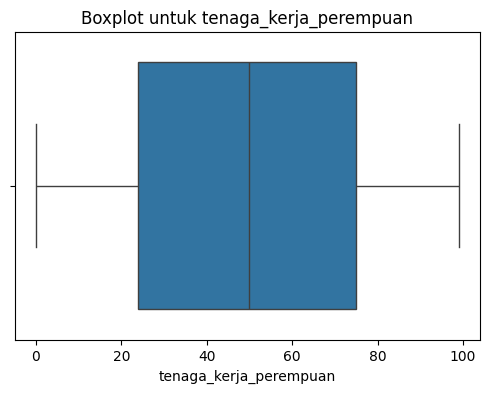

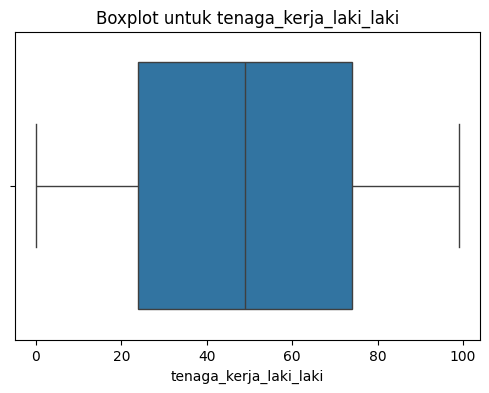

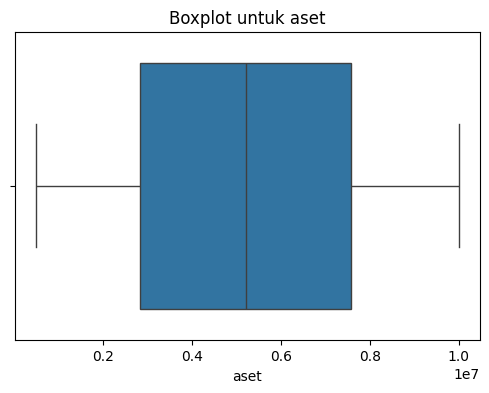

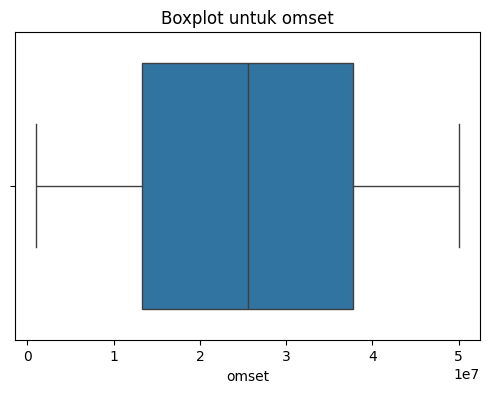

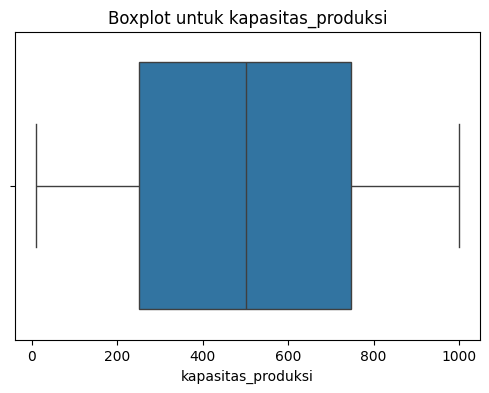

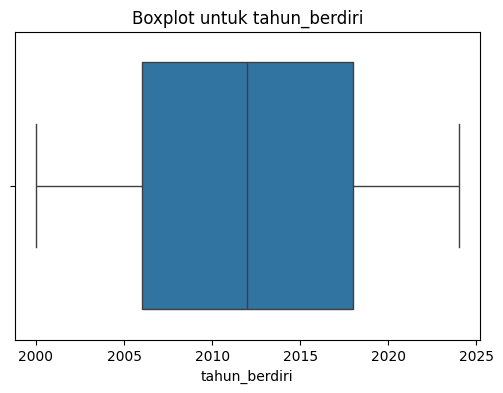

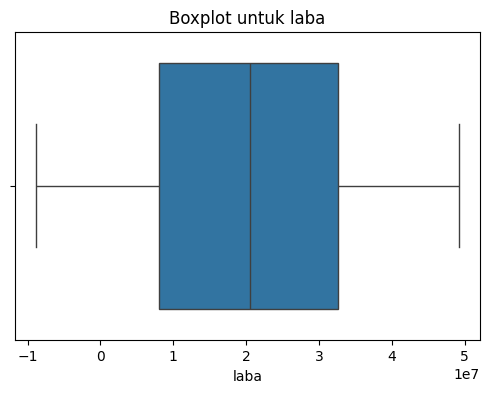

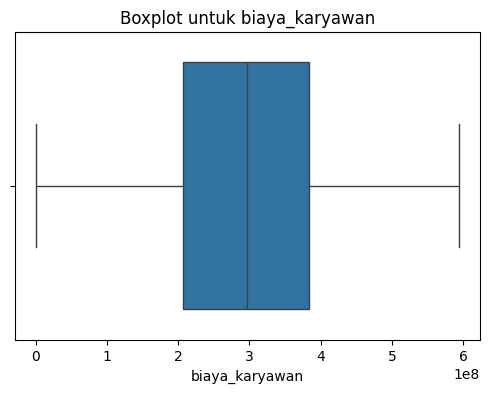

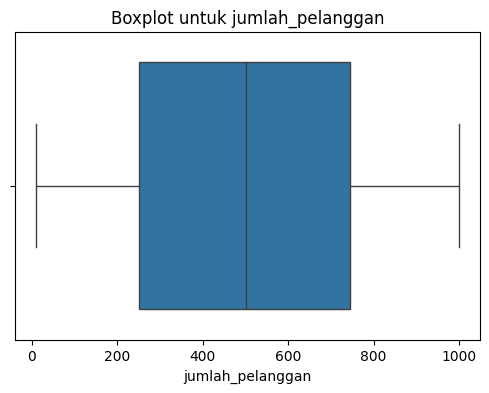

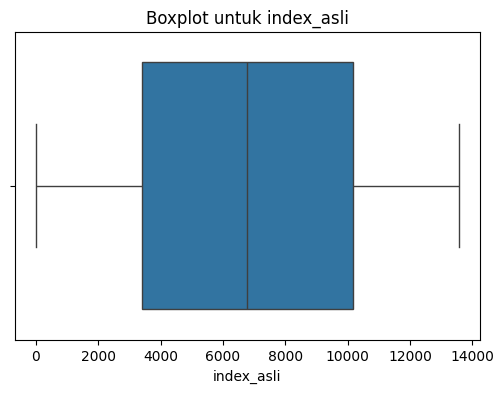

In [7]:
for kolom in dataset.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=dataset, x=kolom)
    plt.title(f'Boxplot untuk {kolom}')
    plt.show()

## 5️⃣ Check Duplicated Row

In [8]:
dataset.duplicated().sum()

np.int64(0)

## 6️⃣ Check Descriptive Statistic

In [9]:
dataset.describe()

,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,kapasitas_produksi,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan,index_asli
count,13408.0,13429.0,13422.0,13423.0,13400.0,13436.0,13407.0,13430.0,13412.0,13564.0
mean,49.699359,49.138432,5223369.174639,25556075.975192,499.804776,2012.028654,20335914.832774,296371183.916605,499.655309,6781.5
std,29.050398,29.045802,2736182.966455,14214044.823177,285.718098,7.263471,14501877.087248,122896125.406971,285.428202,3915.733861
min,0.0,0.0,500233.0,1000509.0,10.0,2000.0,-8838836.0,0.0,10.0,0.0
25%,24.0,24.0,2842985.0,13242694.5,250.0,2006.0,8035038.0,207000000.0,250.0,3390.75
50%,50.0,49.0,5211246.5,25611802.0,501.0,2012.0,20474087.0,297000000.0,501.0,6781.5
75%,75.0,74.0,7573605.5,37722343.5,746.0,2018.0,32651497.5,384000000.0,745.25,10172.25
max,99.0,99.0,9999760.0,49999699.0,999.0,2024.0,49199297.0,594000000.0,999.0,13563.0


## 7️⃣ Check Korelasi antar kolom

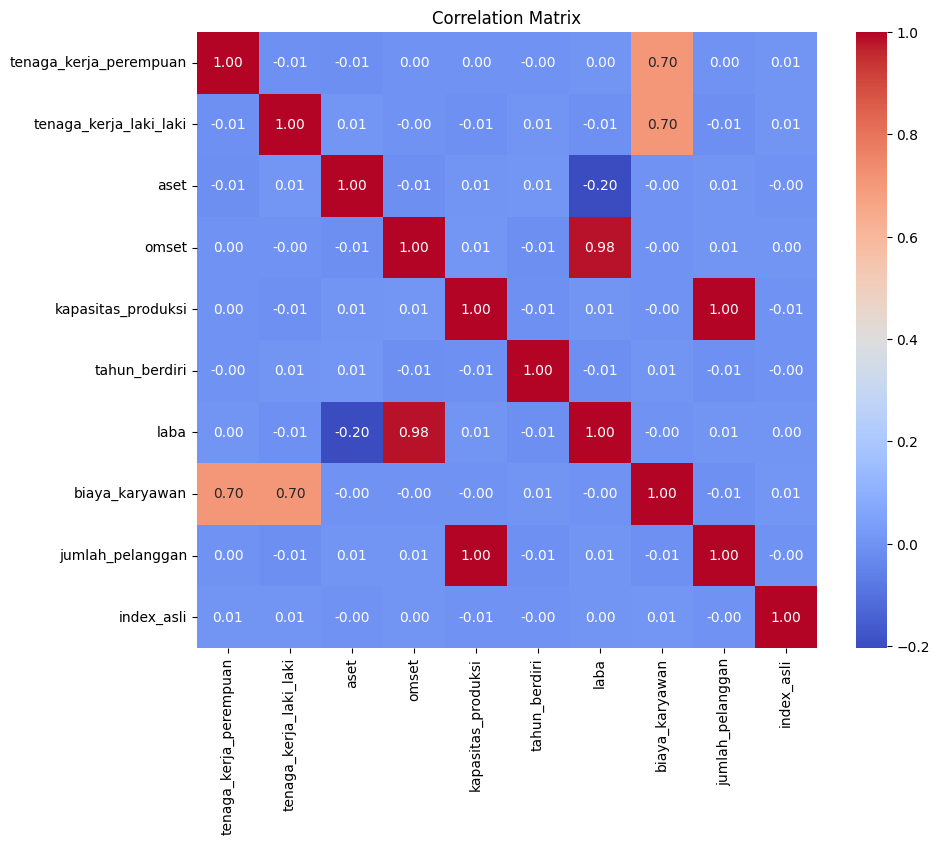

In [10]:
df_numeric = dataset.select_dtypes(include=['number'])

# Hitung correlation matrix
corr_matrix = df_numeric.corr()

# Tampilkan correlation matrix dengan heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#🟡 DATA PREPARATION

## 1️⃣ Change Type Data

In [11]:
# rubah kolom category menjadi tipe category

dataset['jenis_usaha'] = dataset['jenis_usaha'].astype('category')
dataset['marketplace'] = dataset['marketplace'].astype('category')
dataset['status_legalitas'] = dataset['status_legalitas'].astype('category')

## 2️⃣ Dealing with Missing Values

In [12]:

print("=========================================================")
print("               Drop Baris Missing Values                 ")
print("=========================================================")

dataset = dataset.dropna()
print("             berhasil drop baris missing values")

print("\n=========================================================")
print(f"               total baris {dataset.shape[0]}                 ")
print("=========================================================")

               Drop Baris Missing Values                 
             berhasil drop baris missing values

               total baris 11781                 


## 3️⃣ Delete Outlier

In [13]:
# none

## 4️⃣ Transformasi Data

### ✅ Rubah Status Legalitas Menjadi Encode

In [14]:
dataset['status_legalitas'] = dataset['status_legalitas'].map({'Terdaftar': 1, 'Belum Terdaftar': 0})
dataset.head(5)

<ipython-input-14-2432da9c675a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['status_legalitas'] = dataset['status_legalitas'].map({'Terdaftar': 1, 'Belum Terdaftar': 0})


,id_umkm,nama_usaha,jenis_usaha,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,marketplace,kapasitas_produksi,status_legalitas,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan,index_asli
0,28828567,UD. Alif Pamungkas,Kesehatan,1,56,5497149,3347794,Tokopedia,479,0,2015,-2149355,171000000,479,0
1,28828568,UD. Zidanar Panji,Perdagangan,5,44,7398384,39969661,Bukalapak,464,1,2014,32571277,147000000,464,1
3,28828570,UD. Damaris Satria,Jasa,89,5,9576178,20700389,Website Sendiri,986,0,2003,11124211,282000000,986,3
4,28828571,UD. Qasya Wiratama,Jasa,91,59,9456853,4820810,Lazada,314,0,2002,-4636043,450000000,314,4
5,28828572,UD. Grego Wiraatmaja Nara,Jasa,76,36,9072119,19297316,Bukalapak,661,0,2000,10225197,336000000,661,5


### ✅ Normalisasi Kolom Numerik

In [15]:
# dataset_new = dataset.copy()
dataset['tahun_berdiri'] = dataset['tahun_berdiri'].astype('category')
num_cols = dataset.select_dtypes(include='number').columns
dataset_new = dataset.select_dtypes(include='number')
dataset[num_cols] = (dataset[num_cols] - dataset[num_cols].min()) / (dataset[num_cols].max() - dataset[num_cols].min())

In [16]:
dataset.head(3)

,id_umkm,nama_usaha,jenis_usaha,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,marketplace,kapasitas_produksi,status_legalitas,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan,index_asli
0,28828567,UD. Alif Pamungkas,Kesehatan,0.010101,0.565657,0.52602,0.047905,Tokopedia,0.474216,0,2015,0.11526,0.287879,0.474216,0.0
1,28828568,UD. Zidanar Panji,Perdagangan,0.050505,0.444444,0.726161,0.795302,Bukalapak,0.45905,1,2014,0.713498,0.247475,0.45905,0.000074
3,28828570,UD. Damaris Satria,Jasa,0.89899,0.050505,0.955415,0.402045,Website Sendiri,0.986855,0,2003,0.343964,0.474747,0.986855,0.000221


## 5️⃣ Delete Duplicated Row

In [17]:
# none

## 6️⃣ Features Engineering

In [18]:
dataset_new['jumlah_karyawan'] = dataset_new['tenaga_kerja_laki_laki'] + dataset_new['tenaga_kerja_perempuan']
dataset_new.drop(columns=['tenaga_kerja_laki_laki', 'tenaga_kerja_perempuan'], inplace=True)

dataset['jumlah_karyawan'] = dataset['tenaga_kerja_laki_laki'] + dataset['tenaga_kerja_perempuan']
dataset.drop(columns=['tenaga_kerja_laki_laki', 'tenaga_kerja_perempuan'], inplace=True)
dataset.head(3)

,id_umkm,nama_usaha,jenis_usaha,aset,omset,marketplace,kapasitas_produksi,status_legalitas,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan,index_asli,jumlah_karyawan
0,28828567,UD. Alif Pamungkas,Kesehatan,0.52602,0.047905,Tokopedia,0.474216,0,2015,0.11526,0.287879,0.474216,0.0,0.575758
1,28828568,UD. Zidanar Panji,Perdagangan,0.726161,0.795302,Bukalapak,0.45905,1,2014,0.713498,0.247475,0.45905,0.000074,0.494949
3,28828570,UD. Damaris Satria,Jasa,0.955415,0.402045,Website Sendiri,0.986855,0,2003,0.343964,0.474747,0.986855,0.000221,0.949495


## 7️⃣ Delete Columns has Correlation

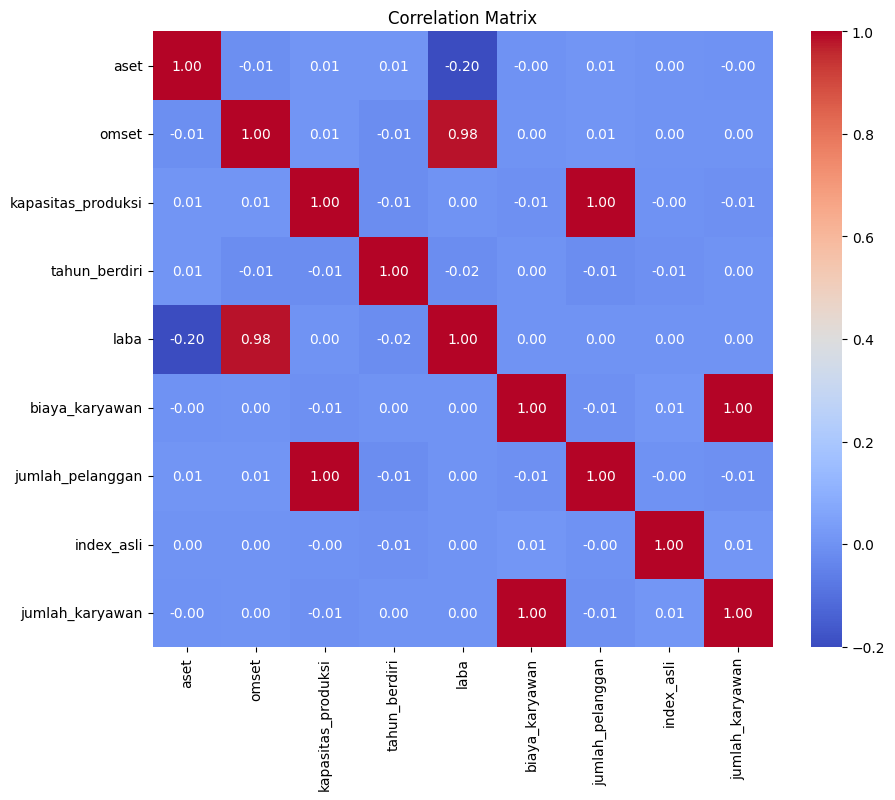

In [19]:
# cek korelasi
dataset['tahun_berdiri'] = dataset['tahun_berdiri'].astype('int')
df_numeric = dataset.select_dtypes(include=['number'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### ✅ Cek Standard Deviasi Antar Kolom Korelasi

In [20]:
# drop kolom dengan std lebih rendah
print(dataset[['omset', 'laba']].std())
dataset.drop(columns=['omset'], inplace=True)

print(dataset[['jumlah_pelanggan', 'kapasitas_produksi']].std())
dataset.drop(columns=['jumlah_pelanggan'], inplace=True)

print(dataset[['biaya_karyawan', 'jumlah_karyawan']].std())
dataset.drop(columns=['jumlah_karyawan'], inplace=True)

omset    0.290005
laba     0.249952
dtype: Float64
jumlah_pelanggan      0.288239
kapasitas_produksi    0.288239
dtype: Float64
biaya_karyawan     0.206393
jumlah_karyawan    0.412785
dtype: Float64


### ✅ Cek Korelasi Final

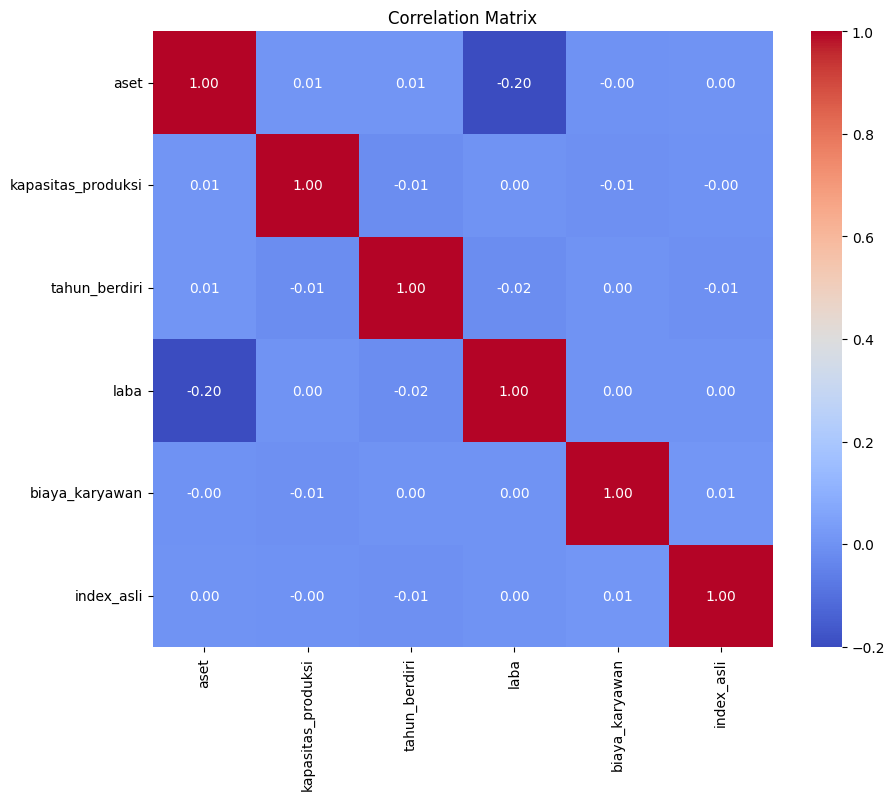

In [21]:
# cek korelasi
dataset['tahun_berdiri'] = dataset['tahun_berdiri'].astype('int')
df_numeric = dataset.select_dtypes(include=['number'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### ✅ Overview Dataset Final

In [22]:
dataset.head(3)

,id_umkm,nama_usaha,jenis_usaha,aset,marketplace,kapasitas_produksi,status_legalitas,tahun_berdiri,laba,biaya_karyawan,index_asli
0,28828567,UD. Alif Pamungkas,Kesehatan,0.52602,Tokopedia,0.474216,0,2015,0.11526,0.287879,0.0
1,28828568,UD. Zidanar Panji,Perdagangan,0.726161,Bukalapak,0.45905,1,2014,0.713498,0.247475,0.000074
3,28828570,UD. Damaris Satria,Jasa,0.955415,Website Sendiri,0.986855,0,2003,0.343964,0.474747,0.000221


#🟡 MODELING

## 1️⃣ K-Means

In [23]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_numeric)
    score = silhouette_score(df_numeric, labels)
    print(f"k = {k}: silhouette = {score:.4f}")

k = 2: silhouette = 0.6162
k = 3: silhouette = 0.5720
k = 4: silhouette = 0.5315
k = 5: silhouette = 0.5257
k = 6: silhouette = 0.4972
k = 7: silhouette = 0.4719
k = 8: silhouette = 0.4527
k = 9: silhouette = 0.4435
k = 10: silhouette = 0.4250


#🟡 EVALUASI

## 1️⃣ Silhouette Score

In [24]:

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(df_numeric)
score = silhouette_score(df_numeric, labels)
print(f"k = 2: silhouette = {score:.4f}")

k = 2: silhouette = 0.6162


#🟡 HASIL

##1️⃣ Visualisasi Per-Cluster

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


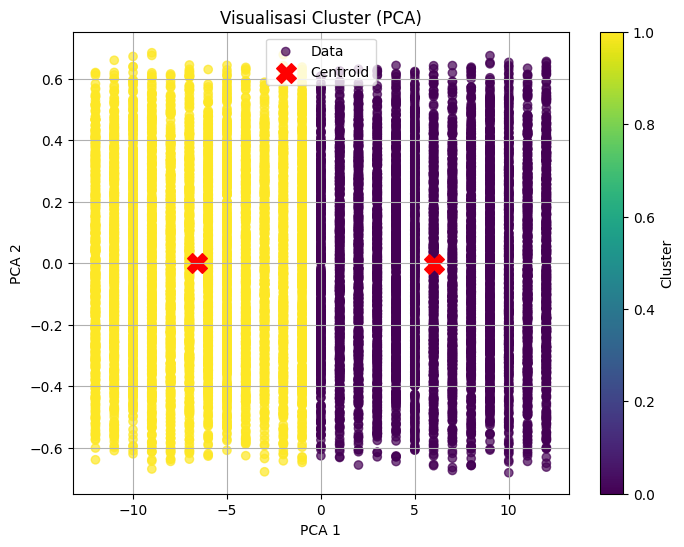

In [25]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


X = df_numeric.drop(columns=['cluster'], errors='ignore')


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)


df_numeric['cluster'] = clusters
dataset['cluster'] = clusters
dataset_new['cluster'] = clusters


centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7, label='Data')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            c='red', marker='X', s=200, label='Centroid')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Cluster (PCA)')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()


## 2️⃣ Overview Dataset hasil cluster

In [26]:
dataset.head(3)

,id_umkm,nama_usaha,jenis_usaha,aset,marketplace,kapasitas_produksi,status_legalitas,tahun_berdiri,laba,biaya_karyawan,index_asli,cluster
0,28828567,UD. Alif Pamungkas,Kesehatan,0.52602,Tokopedia,0.474216,0,2015,0.11526,0.287879,0.0,0
1,28828568,UD. Zidanar Panji,Perdagangan,0.726161,Bukalapak,0.45905,1,2014,0.713498,0.247475,0.000074,0
3,28828570,UD. Damaris Satria,Jasa,0.955415,Website Sendiri,0.986855,0,2003,0.343964,0.474747,0.000221,1


## 3️⃣ Overview Tiap Cluster

In [27]:
# dataset_new.groupby('cluster').describe()

In [28]:
dataset_new.groupby('cluster')[['jumlah_karyawan']].mean()

,jumlah_karyawan
cluster,
0,98.92849
1,98.629741


In [29]:
dataset_new.groupby('cluster')[['aset']].mean()

,aset
cluster,
0,5232417.603356
1,5223758.119284


In [30]:
dataset_new.groupby('cluster')[['omset']].mean()

,omset
cluster,
0,25511955.158984
1,25719719.758596


In [31]:
dataset_new.groupby('cluster')[['omset', 'jumlah_karyawan', 'aset']].mean()

,omset,jumlah_karyawan,aset
cluster,,,
0,25511955.158984,98.92849,5232417.603356
1,25719719.758596,98.629741,5223758.119284


In [32]:
dataset_new.head(5)

,aset,omset,kapasitas_produksi,laba,biaya_karyawan,jumlah_pelanggan,index_asli,jumlah_karyawan,cluster
0,5497149,3347794,479,-2149355,171000000,479,0,57,0
1,7398384,39969661,464,32571277,147000000,464,1,49,0
3,9576178,20700389,986,11124211,282000000,986,3,94,1
4,9456853,4820810,314,-4636043,450000000,314,4,150,1
5,9072119,19297316,661,10225197,336000000,661,5,112,1


In [33]:
dataset.head(5)

,id_umkm,nama_usaha,jenis_usaha,aset,marketplace,kapasitas_produksi,status_legalitas,tahun_berdiri,laba,biaya_karyawan,index_asli,cluster
0,28828567,UD. Alif Pamungkas,Kesehatan,0.52602,Tokopedia,0.474216,0,2015,0.11526,0.287879,0.0,0
1,28828568,UD. Zidanar Panji,Perdagangan,0.726161,Bukalapak,0.45905,1,2014,0.713498,0.247475,0.000074,0
3,28828570,UD. Damaris Satria,Jasa,0.955415,Website Sendiri,0.986855,0,2003,0.343964,0.474747,0.000221,1
4,28828571,UD. Qasya Wiratama,Jasa,0.942854,Lazada,0.307381,0,2002,0.072414,0.757576,0.000295,1
5,28828572,UD. Grego Wiraatmaja Nara,Jasa,0.902353,Bukalapak,0.658241,0,2000,0.328474,0.565657,0.000369,1


### ✅ Menyimpan index asli sebelum preprocessing

In [34]:
dataset['index_asli'] = dataset.index  # Simpan index asli untuk tracking ke data awal

### ✅ Menambahkan hasil clustering ke data awal

In [35]:
df_clusters = dataset[['index_asli', 'cluster']]

df_awal_lengkap = dataset_result.merge(df_clusters, on='index_asli', how='left')

df_awal_lengkap.to_csv('data_awal_dengan_cluster.csv', index=False, float_format="%.0f")
print('✅ File data_awal_dengan_cluster.csv berhasil dibuat.')
files.download("data_awal_dengan_cluster.csv")

✅ File data_awal_dengan_cluster.csv berhasil dibuat.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11781 entries, 0 to 13561
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id_umkm             11781 non-null  object  
 1   nama_usaha          11781 non-null  object  
 2   jenis_usaha         11781 non-null  category
 3   aset                11781 non-null  Float64 
 4   marketplace         11781 non-null  category
 5   kapasitas_produksi  11781 non-null  Float64 
 6   status_legalitas    11781 non-null  category
 7   tahun_berdiri       11781 non-null  int64   
 8   laba                11781 non-null  Float64 
 9   biaya_karyawan      11781 non-null  Float64 
 10  index_asli          11781 non-null  int64   
 11  cluster             11781 non-null  int32   
dtypes: Float64(4), category(3), int32(1), int64(2), object(2)
memory usage: 955.6+ KB
